# Data Preparation

**Import necessary packages**

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

GDP (per capita) information for the year 2017 downloaded from https://data.worldbank.org/indicator/ny.gdp.pcap.cd

In [148]:
gdp = pd.read_csv('developer_survey_2018/WorldGDP.csv', encoding='ISO-8859-1')

In [149]:
gdp.shape

(263, 2)

In [150]:
gdp.head()

,Country Name,2017
0,Aruba,25655.102020
1,Afghanistan,550.068459
2,Angola,4100.289786
3,Albania,4537.579056
4,Andorra,39146.548840


**Read-in survey results**

In [109]:
df = pd.read_csv('developer_survey_2018/survey_results_public_mini.csv')

There are around 100K respondents with over 129 columns

In [110]:
df.shape

(98855, 129)

For the purpose of our analysis, we will only concentrate on the following variables - Country, Gender, ConvertedSalary and EthicsChoice

Also, we dropout rows with missing values for further analysis

In [111]:
subsetdf = df[['Country', 'Gender', 'ConvertedSalary', 'EthicsChoice']].dropna()

In [112]:
subsetdf.shape

(44416, 4)

We will only take in respondents who earns salary

In [113]:
subsetdf1 = subsetdf[subsetdf.ConvertedSalary>0]

In [114]:
subsetdf1.shape

(43680, 4)

Also, for further ease of analysis, we will only consider Male/Female gender

In [115]:
subsetdf2 = subsetdf1[subsetdf1.Gender.isin(['Male', 'Female'])]

This brings down our data to around 43K rows

In [116]:
subsetdf2.shape

(43056, 4)

In [117]:
subsetdf2.head()

,Country,Gender,ConvertedSalary,EthicsChoice
1,United Kingdom,Male,70841.0,Depends on what it is
4,South Africa,Male,21426.0,No
5,United Kingdom,Male,41671.0,Depends on what it is
6,United States,Male,120000.0,Depends on what it is
8,United States,Male,250000.0,No


# Questions

## Question 1: How does the gender imbalance vary with respect to countries? 

To answer this question, first let's look at the overall gender distribution. 

In [118]:
subsetdf2.Gender.value_counts(normalize=False)

Male      40463
Female     2593
Name: Gender, dtype: int64

In [119]:
subsetdf2.Gender.value_counts(normalize=True)

Male      0.939776
Female    0.060224
Name: Gender, dtype: float64

**Overall, there are about 6% of females represented in the survey**

Function to calculate gender distribution for a given country

In [120]:
def country_gender_distribution(country, base=subsetdf2):
    """
        Function to calculate gender wise distribution for a given country
        Inputs:
            - country (str): country name for which distribution is to be calculated
            - base (pandas dataframe): source dataframe
        Returns:
            - tuple (male and female counts)
            
    """
    tmp = base[base.Country==country]
    return tmp[tmp.Gender == 'Male'].shape[0], tmp[tmp.Gender == 'Female'].shape[0]

In [121]:
country_list, nmen_list, nwomen_list = [], [], []
for c in subsetdf2.Country.unique(): #loop over each country to calculate gender distribution
    m, f = country_gender_distribution(c)
    country_list.append(c)
    nmen_list.append(m)
    nwomen_list.append(f)

In [122]:
#summarize the results
summary1 = pd.DataFrame({'country': country_list,
             'nmen': nmen_list,
             'nwomen': nwomen_list}, columns=['country', 'nmen', 'nwomen'])

Calculate gender distribution in percentages

In [123]:
summary1['total'] = summary1['nmen'] + summary1['nwomen']

In [124]:
summary1['men%'] = (summary1['nmen']*100/summary1['total']).round(2)
summary1['women%'] = (summary1['nwomen']*100/summary1['total']).round(2)

In [125]:
summary1.head()

,country,nmen,nwomen,total,men%,women%
0,United Kingdom,3312,197,3509,94.39,5.61
1,South Africa,317,15,332,95.48,4.52
2,United States,10864,994,11858,91.62,8.38
3,Sweden,596,26,622,95.82,4.18
4,Australia,1012,65,1077,93.96,6.04


In [126]:
summary1.shape

(155, 6)

Although there are about 155 countries in the summary table, not all of them have significant entries to be statistically relevant. Hence, we only consider those contries whose total respondents are greater than 100.

In [127]:
countries_considered = summary1[summary1.total>100].country.tolist()

This brings down our number of countries to 51

In [129]:
len(countries_considered)

51

In [128]:
summary1_r = summary1[summary1.total>100]

Let's look at those contries who are fairing better than average in terms of female representation.

In [59]:
summary1_r[summary1_r['women%']>0.060224*100].sort_values('women%', ascending=False)

,country,nmen,nwomen,total,men%,women%
20,Egypt,93,15,108,86.11,13.89
31,Argentina,240,30,270,88.89,11.11
56,Nigeria,106,11,117,90.60,9.40
70,Philippines,120,12,132,90.91,9.09
55,Malaysia,107,10,117,91.45,8.55
2,United States,10864,994,11858,91.62,8.38
23,Canada,1679,144,1823,92.10,7.90
13,Romania,297,25,322,92.24,7.76
40,Sri Lanka,117,9,126,92.86,7.14
33,Ireland,269,19,288,93.40,6.60


And the countries that are fairing worse than average

In [60]:
summary1_r[summary1_r['women%']<0.060224*100].sort_values('women%', ascending=False)

,country,nmen,nwomen,total,men%,women%
27,Russian Federation,1029,64,1093,94.14,5.86
51,Ukraine,372,23,395,94.18,5.82
12,Japan,149,9,158,94.30,5.70
41,Serbia,133,8,141,94.33,5.67
0,United Kingdom,3312,197,3509,94.39,5.61
34,Finland,258,15,273,94.51,5.49
47,Belarus,105,6,111,94.59,5.41
28,Israel,387,22,409,94.62,5.38
29,Netherlands,855,48,903,94.68,5.32
17,Turkey,320,17,337,94.96,5.04


In [153]:
summary1_gdp = pd.merge(summary1_r, gdp, left_on='country', right_on='Country Name', how='left')

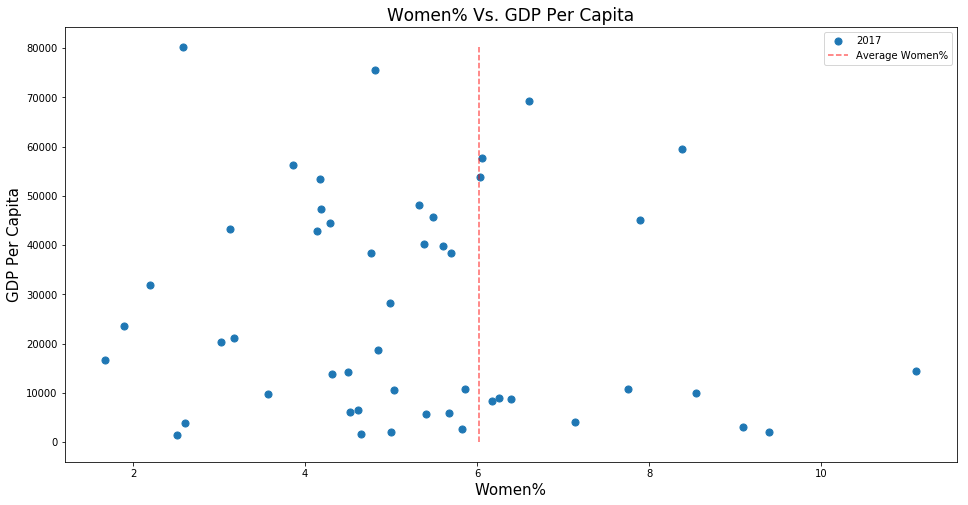

In [226]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(summary1_gdp['women%'], summary1_gdp['2017'], s=50)
ax.vlines(0.060224*100, -10, summary1_gdp['2017'].max()+100, linestyle = '--', alpha=0.6, color='r', label='Average Women%')
plt.legend()
ax.set_xlabel('Women%', fontsize=15)
ax.set_ylabel('GDP Per Capita', fontsize=15)
plt.title('Women% Vs. GDP Per Capita', fontsize=17)
plt.savefig('images/question1.jpg')
plt.show()

**Findings**: 
- The overall female representation is a mere ~6%
- Egypt, Argentian and Nigeria have the best female representation, and Italy, Slovenia and Lithuania the worst.
- Interestingly, there is no relation between GDP Per Capita and the percentage of women represented in the survey.

## Question 2: How does salary vary across contries between genders?

Function to calculate mean salary for male and female genders for a given country

In [182]:
def country_gender_salary_distribution(country, base=subsetdf2):
    """
        Function to calculate mean salary of gender for a given country
        Inputs:
            - country (str): country name for which distribution is to be calculated
            - base (pandas dataframe): source dataframe
        Returns:
            - tuple (male and female mean salary)
            
    """
    tmp = base[base.Country==country]
    return tmp[tmp.Gender == 'Male']['ConvertedSalary'].mean(), tmp[tmp.Gender == 'Female']['ConvertedSalary'].mean()

**Overall Salary Difference between Female and Male**

In [197]:
subsetdf2[subsetdf2.Gender == 'Female'].ConvertedSalary.mean() - \
subsetdf2[subsetdf2.Gender == 'Male'].ConvertedSalary.mean()

-8196.358768532678

In [183]:
country_list, meanSalMen_list, meanSalWomen_list = [], [], []
for c in subsetdf2.Country.unique():
    m, f = country_gender_salary_distribution(c)
    country_list.append(c)
    meanSalMen_list.append(m)
    meanSalWomen_list.append(f)

In [184]:
#summarize the results
summary2 = pd.DataFrame({'country': country_list,
                        'menMeanSal': meanSalMen_list,
                        'womenMeanSal': meanSalWomen_list}, columns=['country', 'menMeanSal', 'womenMeanSal'])

In [185]:
#rounding off the means
summary2['menMeanSal'] = summary2['menMeanSal'].round(0)
summary2['womenMeanSal'] = summary2['womenMeanSal'].round(0)

In [186]:
#calculate the salary difference between female and male 
summary2['salDiff'] = summary2['womenMeanSal'] - summary2['menMeanSal']

In [187]:
#subset the countries considered to include only those who have significant respondents
summary2_r = summary2[summary2.country.isin(countries_considered)]

In [189]:
summary2_r.sort_values('salDiff').head()

,country,menMeanSal,womenMeanSal,salDiff
43,Norway,157861.0,80827.0,-77034.0
1,South Africa,72892.0,33612.0,-39280.0
46,Austria,74439.0,37189.0,-37250.0
24,Spain,90122.0,52942.0,-37180.0
12,Japan,78183.0,41014.0,-37169.0


In [190]:
summary2_r.sort_values('salDiff').tail()

,country,menMeanSal,womenMeanSal,salDiff
22,Brazil,55938.0,81816.0,25878.0
36,Singapore,93163.0,121455.0,28292.0
37,Pakistan,14825.0,55354.0,40529.0
38,Belgium,73009.0,123354.0,50345.0
55,Malaysia,26990.0,109815.0,82825.0


Let's see if the difference has any relation with the GDP per capita

In [191]:
summary2_gdp = pd.merge(summary2_r, gdp, left_on='country', right_on='Country Name', how='left')

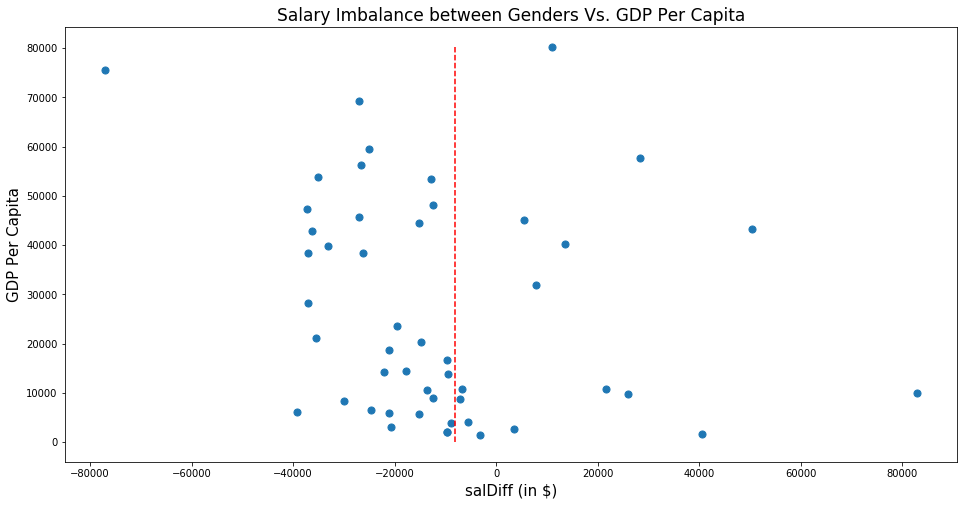

In [225]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(summary2_gdp['salDiff'], summary2_gdp['2017'], s=50)
ax.vlines(-8196.358768532678, -10, summary2_gdp['2017'].max()+100, linestyle='--', color='r', label='Overall Salary Diff')
ax.set_xlabel('salDiff (in $)', fontsize=15)
ax.set_ylabel('GDP Per Capita', fontsize=15)
plt.title('Salary Imbalance between Genders Vs. GDP Per Capita', fontsize=17)
plt.savefig('images/question2.jpg')
plt.show()

In [203]:
summary2_gdp[summary2_gdp.salDiff<-8196].sort_values('salDiff').head()

,country,menMeanSal,womenMeanSal,salDiff,Country Name,2017
40,Norway,157861.0,80827.0,-77034.0,Norway,75504.566260
1,South Africa,72892.0,33612.0,-39280.0,South Africa,6151.077955
41,Austria,74439.0,37189.0,-37250.0,Austria,47290.911650
24,Spain,90122.0,52942.0,-37180.0,Spain,28156.815840
12,Japan,78183.0,41014.0,-37169.0,Japan,38428.097320


In [205]:
summary2_gdp[summary2_gdp.salDiff>-8196].sort_values('salDiff').tail()

,country,menMeanSal,womenMeanSal,salDiff,Country Name,2017
22,Brazil,55938.0,81816.0,25878.0,Brazil,9821.407686
34,Singapore,93163.0,121455.0,28292.0,Singapore,57714.296630
35,Pakistan,14825.0,55354.0,40529.0,Pakistan,1547.853414
36,Belgium,73009.0,123354.0,50345.0,Belgium,43323.807340
47,Malaysia,26990.0,109815.0,82825.0,Malaysia,9951.544153


**Findings**: 
    
- The overall (mean) salary imbalance stood at ~ $8200
- Malaysia, Belgium and Pakistan have the highest (positive) salary difference between female and male respondents, and Norway, South Africa and Austria the highest (negative) difference.
- Interestingly, there is no relation between GDP Per Capita and the salary difference between genders.

## Question 3: How does ethical choices vary across genders? 

Specifically, let's see how the repondents answer to the question - **"Imagine that you were asked to write code for a purpose or product that you consider extremely unethical. Do you write the code anyway?"** - vary across genders.

Let's look at the absolute counts

In [96]:
subsetdf2[subsetdf2.Gender=='Male'].EthicsChoice.value_counts()

No                       24220
Depends on what it is    14601
Yes                       1642
Name: EthicsChoice, dtype: int64

In [95]:
subsetdf2[subsetdf2.Gender=='Female'].EthicsChoice.value_counts()

No                       1739
Depends on what it is     794
Yes                        60
Name: EthicsChoice, dtype: int64

Now, let's look at the percentages

In [97]:
subsetdf2[subsetdf2.Gender=='Male'].EthicsChoice.value_counts(normalize=True)

No                       0.598572
Depends on what it is    0.360848
Yes                      0.040580
Name: EthicsChoice, dtype: float64

In [98]:
subsetdf2[subsetdf2.Gender=='Female'].EthicsChoice.value_counts(normalize=True)

No                       0.670652
Depends on what it is    0.306209
Yes                      0.023139
Name: EthicsChoice, dtype: float64

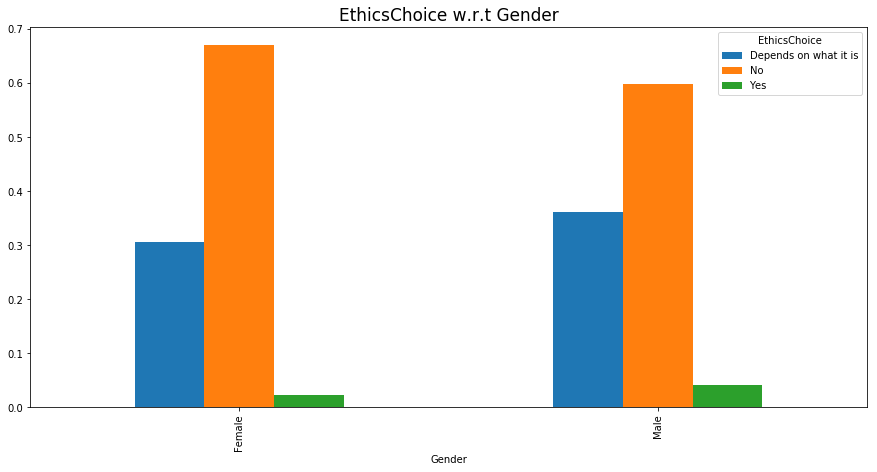

In [224]:
fig, ax = plt.subplots(figsize=(15, 7))
subsetdf2.groupby('Gender')['EthicsChoice'].value_counts(normalize=True).unstack().plot(kind='bar', ax=ax)
plt.title('EthicsChoice w.r.t Gender', fontsize=17)
plt.savefig('images/question3.jpg')
plt.show()

**Findings:**

- Males are more inclined to make unethical choices - almost twice as much as female percentage who would make this choice. Male - 4%, Female - 2.3%. However, overall, very few respondents said they would make unethical choices. 
- There is a significant difference in the percentage of respondents who would strongly stick to ethical standards between males and females (59% Male Vs. 67% Female).
- More percentage of males than females (36% Male vs. 30% Female) said their ethical choices "Depends on what (kind of unethical purpose/product) it is" before they make an ethical choice.